In [36]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import linalg as LA

def get_laplacians(x, n_agents, metric, rr, ra, n_neighbors):
    A_r = np.zeros((n_agents, n_agents))
    D_r = np.zeros((n_agents, n_agents))
    A_a = np.zeros((n_agents, n_agents))
    D_a = np.zeros((n_agents, n_agents))
    
    if metric == "dist":
        for i in range(n_agents):
            for j in range(n_agents):
                if i == j:
                    continue
                dist = np.sum((x[j] - x[i]) ** 2) ** 0.5
                if dist < rr:
                    A_r[i, j] = 1
                    #A_r[j, i] = 1
                    D_r[i, i] += 1
                elif dist < ra:
                    A_a[i, j] = 1
                    #A_a[j, i] = 1
                    D_a[i, i] += 1
    elif metric == "nn":
        for i in range(n_agents):
            dists = np.zeros((n_agents))
            for j in range(n_agents):
                if i == j:
                    dists[j] = world_dim ** 2 + world_dim ** 2
                else:
                    dists[j] = np.sum((x[j] - x[i]) ** 2) ** 0.5
            indices = np.argsort(dists)[:n_neighbors]
            within_radius = False # nearest neighbor within radius UNK
            #print(dists)
            for nn in range(n_neighbors):
                idx = indices[nn]
                dist = dists[idx]
                if dist < rr: # then nearest neighbor is within radius
                    A_r[i, idx] = 1
                    #A_r[idx, i] = 1
                    D_r[i, i] += 1
                    within_radius = True
                elif not within_radius:
                    A_a[i, idx] = 1
                    #A_a[j, i] = 1
                    D_a[i, i] += 1
            if not within_radius:
                assert D_a[i,i] == n_neighbors
            else:
                assert  D_a[i,i] <= n_neighbors
                
    return D_r, A_r, D_a, A_a

def get_fiedler_ev(mtx):
    eig_vals = LA.eigvals(mtx)
    eig_vals = np.sort(eig_vals)
    non_zero = eig_vals[eig_vals>1e-10]
    if len(non_zero)==0:
        return 0
    else:
        #print(non_zero[0], eig_vals[1])
        return non_zero[0]

<IPython.core.display.Javascript object>


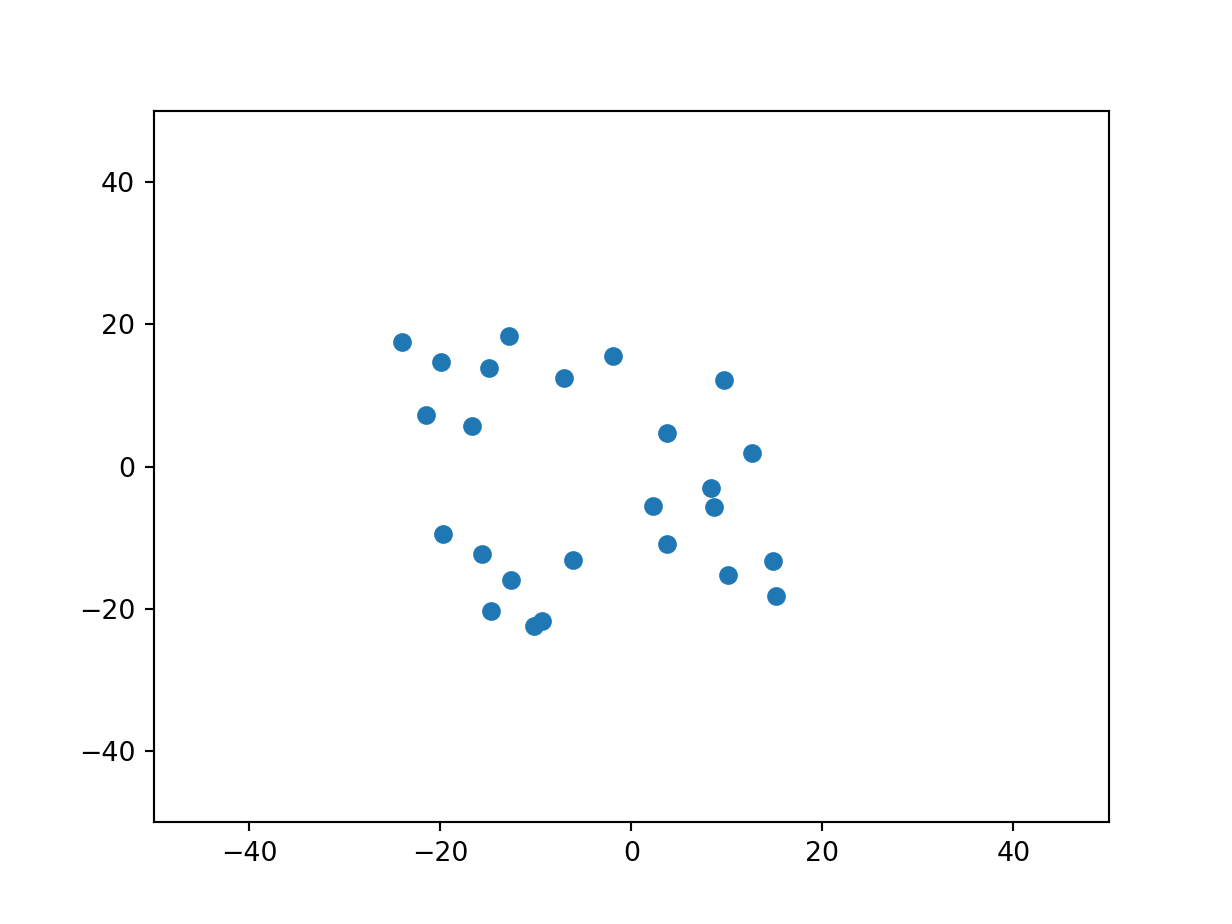

Done


In [37]:
%matplotlib notebook
n_agents = 25
world_dim = 100
M = world_dim / 4
n_neighbors = 5
metric = "nn" # "dist","nn"
n_timesteps = 25
learning_rate = .01
x = 2 * M * (np.random.random((n_agents, 2)) - 0.5)
radius_r = 5
radius_a = 15
plot = True
fiedler_r = []
avg_deg_r = []
fiedler_a = []
avg_deg_a = []

if plot:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()

for step in range(n_timesteps):
    ax.clear()
    ax.scatter(x[:,0], x[:,1])
    ax.set_xlim((-world_dim / 2,world_dim / 2))
    ax.set_ylim((-world_dim / 2,world_dim / 2))
    fig.canvas.draw()

    D_r, A_r, D_a, A_a = get_laplacians(x, n_agents, metric, radius_r, radius_a, n_neighbors)
    #print(np.sum(D_r+D_a, axis=1))
                 
    L_r = D_r - A_r
    L_a = D_a - A_a
    x += (np.matmul(L_r, x) + np.matmul(-L_a, x))*learning_rate
    fiedler_r.append(get_fiedler_ev(L_r))
    fiedler_a.append(get_fiedler_ev(L_a))
    avg_deg_r.append(np.mean(D_r.diagonal()))
    avg_deg_a.append(np.mean(D_a.diagonal()))
    
    plt.pause(.25)
        
print("Done")


C:\Users\Taylor\AppData\Local\conda\conda\envs\Team\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0,0.5,'Avg Degree of D_a')

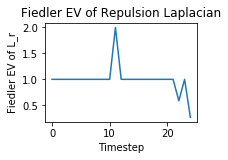

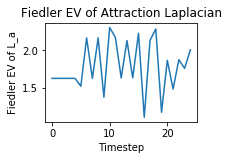

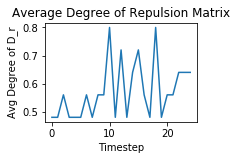

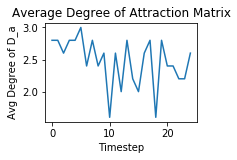

In [38]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(2,2,1)
ax.plot(fiedler_r)
ax.set_title("Fiedler EV of Repulsion Laplacian")
ax.set_xlabel("Timestep")
ax.set_ylabel("Fiedler EV of L_r")

fig = plt.figure()
ax = fig.add_subplot(2,2,2)
ax.plot(fiedler_a)
ax.set_title("Fiedler EV of Attraction Laplacian")
ax.set_xlabel("Timestep")
ax.set_ylabel("Fiedler EV of L_a")

fig = plt.figure()
ax = fig.add_subplot(2,2,3)
ax.plot(avg_deg_r)
ax.set_title("Average Degree of Repulsion Matrix")
ax.set_xlabel("Timestep")
ax.set_ylabel("Avg Degree of D_r")

fig = plt.figure()
ax = fig.add_subplot(2,2,4)
ax.plot(avg_deg_a)
ax.set_title("Average Degree of Attraction Matrix")
ax.set_xlabel("Timestep")
ax.set_ylabel("Avg Degree of D_a")